In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import preprocess


In [2]:
df_train_data   = pd.read_csv("data/train_time_series.csv", index_col=0)
df_train_labels = pd.read_csv("data/train_labels.csv", index_col=0)
df_test_data   = pd.read_csv("data/test_time_series.csv", index_col=0)
df_test_labels = pd.read_csv("data/test_labels.csv", index_col=0)

df_train_data = df_train_data.drop(df_train_data.index[[range(4)]])
df_train_labels = df_train_labels.drop(df_train_labels.index[[0]])

df_train_labels.head()

,timestamp,UTC time,label
20599,1565109932090,2019-08-06T16:45:32.090,1
20609,1565109933092,2019-08-06T16:45:33.092,1
20619,1565109934094,2019-08-06T16:45:34.094,1
20629,1565109935097,2019-08-06T16:45:35.097,1
20639,1565109936099,2019-08-06T16:45:36.099,1


In [3]:
df_train_data.head()

,timestamp,UTC time,accuracy,x,y,z
20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
20591,1565109931288,2019-08-06T16:45:31.288,unknown,-0.010880,-0.967575,0.170898
20592,1565109931388,2019-08-06T16:45:31.388,unknown,0.052841,-0.982330,0.235565
20593,1565109931488,2019-08-06T16:45:31.488,unknown,0.032974,-1.053207,0.256714
20594,1565109931589,2019-08-06T16:45:31.589,unknown,-0.090424,-0.972794,0.356308


In [4]:
df_train_data = df_train_data.drop('accuracy', axis=1)
df_train_data.head()

,timestamp,UTC time,x,y,z
20590,1565109931188,2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450
20591,1565109931288,2019-08-06T16:45:31.288,-0.010880,-0.967575,0.170898
20592,1565109931388,2019-08-06T16:45:31.388,0.052841,-0.982330,0.235565
20593,1565109931488,2019-08-06T16:45:31.488,0.032974,-1.053207,0.256714
20594,1565109931589,2019-08-06T16:45:31.589,-0.090424,-0.972794,0.356308


In [5]:
activity_dict={1:'standing', 2: 'walking', 3:'stairs down', 4:'stairs up'}

### Exploratory Data Analysis

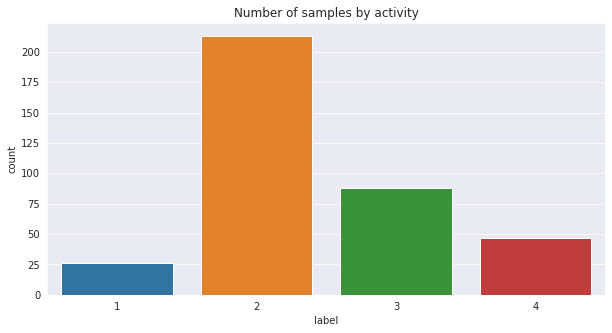

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'label', data = df_train_labels)
plt.title('Number of samples by activity')
plt.show()

In [7]:
def list_exp(num_list,n=10):
    list_num=[]
    for i in range(n):
        list_num = list_num+list(map(lambda x:x-i,num_list))
    return sorted(list_num)


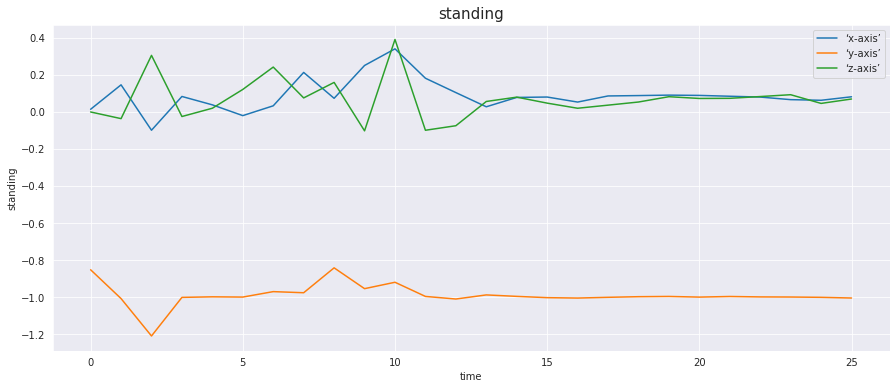

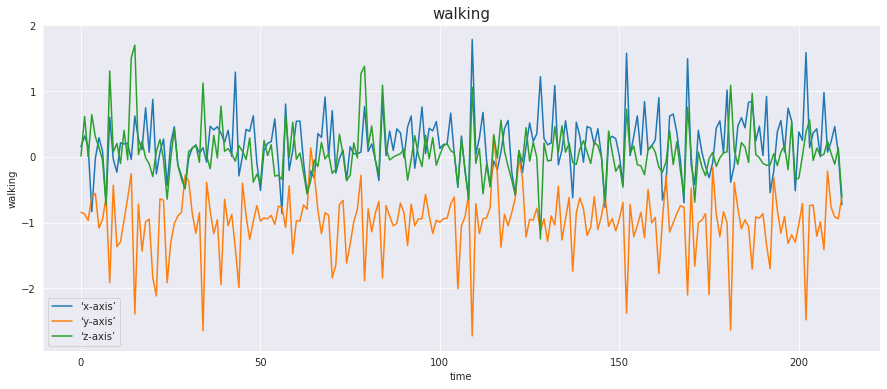

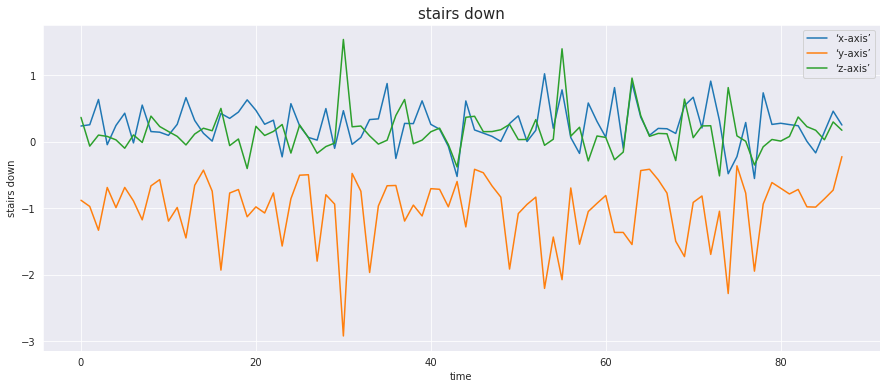

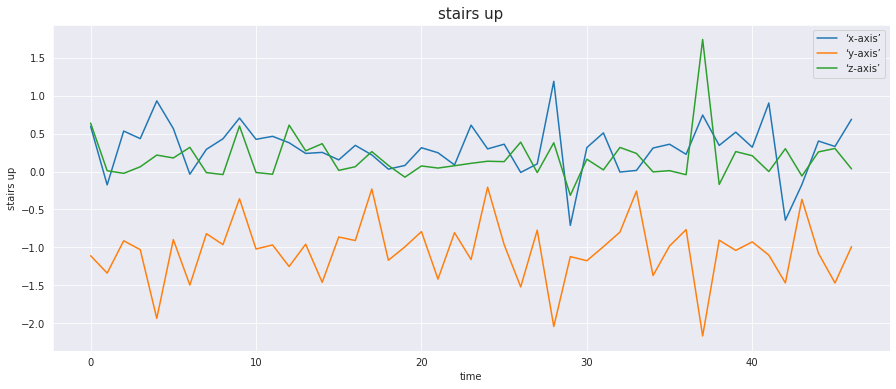

In [8]:
for i in range(1,5):
  L=list(df_train_labels[df_train_labels['label'] == i].index)
  data = df_train_data.loc[L].reset_index()
  data.index.name='time'
  #print(data)
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'x', x = 'time', data = data)
  sns.lineplot(y = 'y', x = 'time', data = data)
  sns.lineplot(y = 'z', x = 'time', data = data)
  plt.legend(['‘x-axis’', '‘y-axis’', '‘z-axis’'])
  plt.ylabel(activity_dict[i])
  plt.title(activity_dict[i], fontsize = 15)
  plt.show()

In [9]:
activities= df_train_labels['label'].apply(lambda x: activity_dict[x])
#df_train_labels = df_train_labels.drop('label', axis=1)
plot_data=df_train_data[df_train_data.index%10==9]
plot_data=pd.concat((plot_data,activities),axis=1)
plot_data.head()

,timestamp,UTC time,x,y,z,label
20599,1565109932090,2019-08-06T16:45:32.090,0.013718,-0.852371,-0.000870,standing
20609,1565109933092,2019-08-06T16:45:33.092,0.145584,-1.007843,-0.036819,standing
20619,1565109934094,2019-08-06T16:45:34.094,-0.099380,-1.209686,0.304489,standing
20629,1565109935097,2019-08-06T16:45:35.097,0.082794,-1.001434,-0.025375,standing
20639,1565109936099,2019-08-06T16:45:36.099,0.037582,-0.998383,0.019333,standing


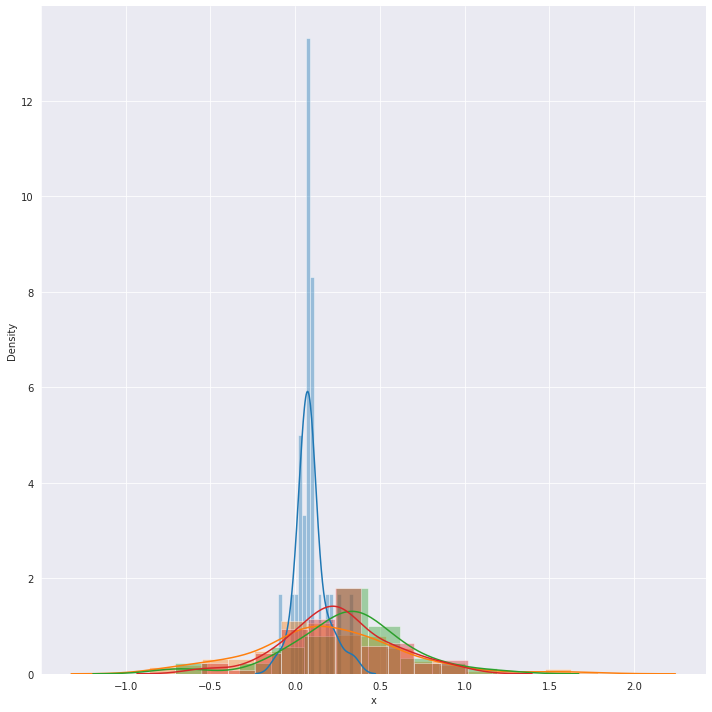

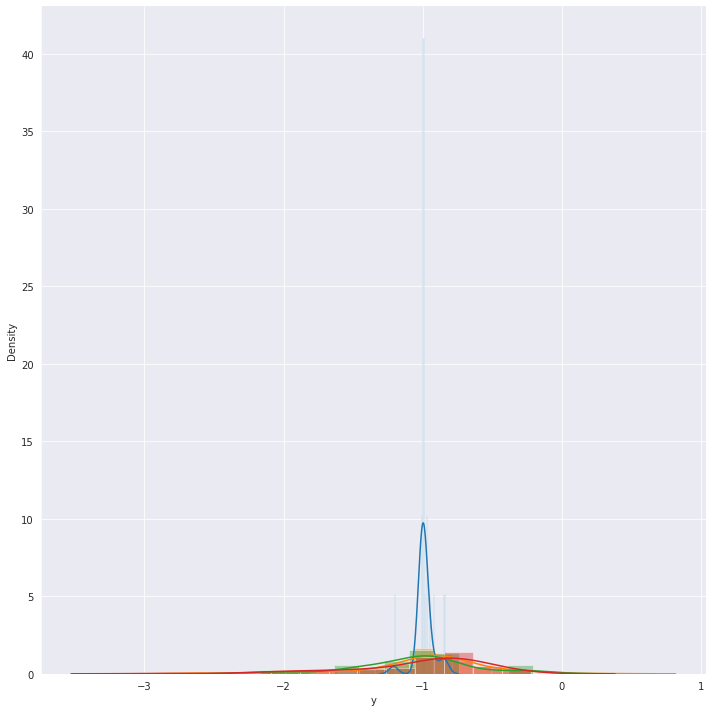

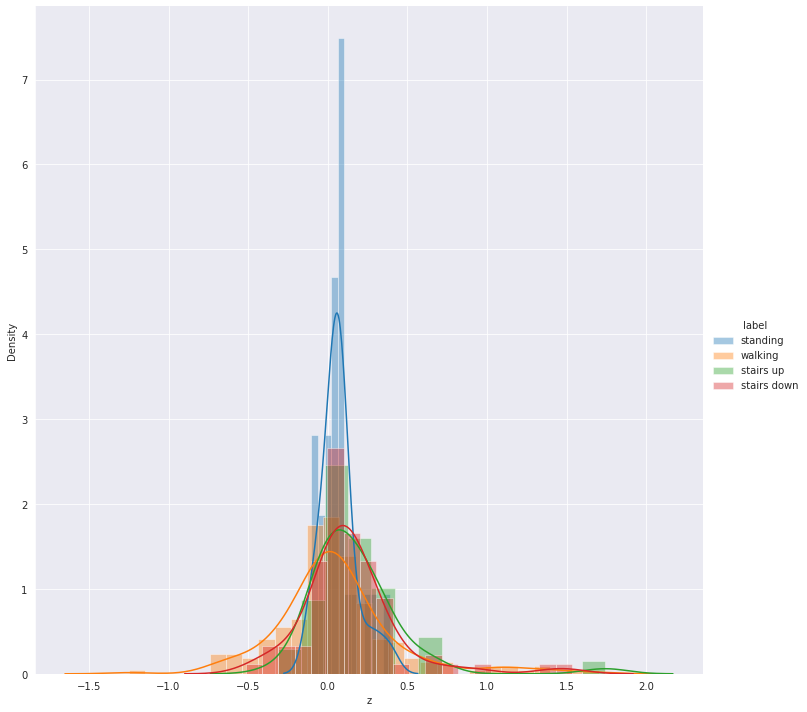

In [10]:
sns.FacetGrid(plot_data, hue = 'label', size = 10).map(sns.distplot,'x')
sns.FacetGrid(plot_data, hue = 'label', size = 10).map(sns.distplot,'y')
sns.FacetGrid(plot_data, hue = 'label', size = 10).map(sns.distplot,'z').add_legend();

### Feature Engineering